In [3]:
# IMPORTANDO LAS LIBRERIAS NECESARIAS 
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [7]:
# Importamos la base de datos con las que trabajaremos extraida de datos publicos del mineduc año 2022
# se encuentra en el siguiente link:
# https://datosabiertos.mineduc.cl/notas-y-egresados-de-ensenanza-media/

In [4]:
# Defino una wrangle function para ir limpiando la función 
def wrangle(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Agrego una mask_region para ver solo los colegios de la Región Metropolitana de Santiago de Chile 
    mask_region=df["COD_REG_RBD"]==13 
    #Establezco una mask por la comuna de Puente Alto ya que es la que mas estudiantes tiene
    mask_PA = df["NOM_COM_RBD"]== "PUENTE ALTO"
    mask_maipu=df["NOM_COM_RBD"]=="MAIPÚ"
    #mask_code =df["RBD"]==9881 ESTE ES EL RBD DEL VICENTE REYES
    #df = df[mask_region & mask_PA]
    return df
    

In [5]:
#Establezco la ruta del archivo que va a ser leida en la wrangle function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
df = wrangle(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", df.shape);
df.head()


C:\Users\amilc\AppData\Local\Temp\ipykernel_17324\192325331.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (3405130, 37)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,6",98,P,P,0
1,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,T,0
2,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,T,0
4,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0


In [6]:
#Del df podemos obtener información interesante para el proyecto por ejemplo
#Cantidad de colegios en toda la republica de Chile que se reportan en esa base de datos:
print("Los datos a continuación pertenecen a la educación media de la Republica de Chile")
num_colegios = df['NOM_RBD'].nunique()
print("Número de colegios en la Republica de Chile:", num_colegios)
#De igual manera podemos observar la matricula total de estudiantes de Educación Media en la Republica de Chile
num_estudiantes_totales= df.shape[0]
print("Número total de estudiantes en chile:",num_estudiantes_totales)
#Por lo tanto la distribución de estudiantes en chile sin considerar distingo por región o comuna deberia ser la siguiente:
estudiantes_por_colegio = num_estudiantes_totales / num_colegios
estudiantes_por_colegio = round(estudiantes_por_colegio, 2)
print("Estudiantes por colegio en la Republica de Chile:", estudiantes_por_colegio,"no considera regiones")
print("El cálculo de estudiantes por colegio es ideal en este sentido ya que se sabe que la mayor concentración de la población esta en la región metropolitana")

Los datos a continuación pertenecen a la educación media de la Republica de Chile
Número de colegios en la Republica de Chile: 8257
Número total de estudiantes en chile: 3405130
Estudiantes por colegio en la Republica de Chile: 412.39 no considera regiones
El cálculo de estudiantes por colegio es ideal en este sentido ya que se sabe que la mayor concentración de la población esta en la región metropolitana


In [92]:
#Con 'COD_DEPE2' voy a poder ver como estan distribuidos esos 8257 en cuanto a dependecia se refiere
dependencia=df['COD_DEPE2'].unique()
print(dependencia)
#Donde sabemos que 2=Particular subvensionado (PS); 1=Municipal (M); 3=Particular pagado 

[5 2 3 1 4]


In [7]:
colegios_unicos = df.drop_duplicates(subset='NOM_RBD')

# Contar los tipos de colegios en los colegios únicos
tipo_counts = colegios_unicos['COD_DEPE'].value_counts().sort_index()

# Inicializar una variable para sumar las cantidades
total_colegios = 0

# Crear un nuevo DataFrame con los resultados
result_data = {'Tipo de colegio': [], 'Cantidad': []}
for code in [5, 4, 3, 2, 1]:
    count = tipo_counts.get(code, 0)
    total_colegios += count
    result_data['Tipo de colegio'].append(f"Ciudad tipo {code}")
    result_data['Cantidad'].append(count)

# Agregar el total al DataFrame de resultados
result_data['Tipo de colegio'].append("Total colegios en ciudades")
result_data['Cantidad'].append(total_colegios)

# Calcular la diferencia y agregarla al DataFrame de resultados
num_colegios = df['NOM_RBD'].nunique()
diferencia = num_colegios - total_colegios
result_data['Tipo de colegio'].append("Total de colegios rurales")
result_data['Cantidad'].append(diferencia)

# Agregar el Gran Total al DataFrame de resultados
result_data['Tipo de colegio'].append("Gran Total")
result_data['Cantidad'].append(num_colegios)

result_df = pd.DataFrame(result_data)

print(result_df)



              Tipo de colegio  Cantidad
0               Ciudad tipo 5        70
1               Ciudad tipo 4       479
2               Ciudad tipo 3      3239
3               Ciudad tipo 2      3117
4               Ciudad tipo 1       787
5  Total colegios en ciudades      7692
6   Total de colegios rurales       565
7                  Gran Total      8257


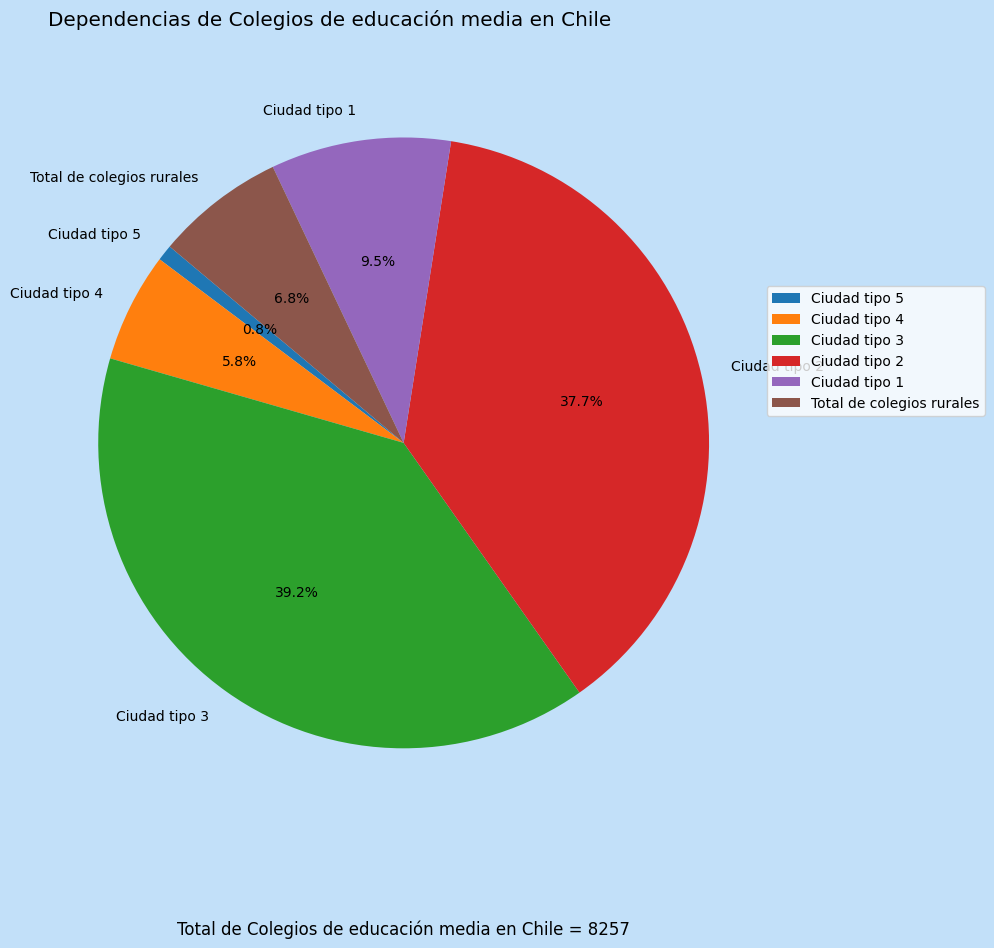

In [185]:
# Filtrar el DataFrame para excluir "Gran Total" y "Total colegios en comunas"
filtered_result_df = result_df[~result_df['Tipo de colegio'].isin(["Gran Total", "Total colegios en ciudades"])]

# Color de fondo azul celeste claro
color_fondo = "#C2E0F9"

plt.figure(figsize=(10, 9.5), facecolor=color_fondo)  # Establecer el color de fondo
wedges, texts, autotexts = plt.pie(filtered_result_df['Cantidad'], labels=filtered_result_df['Tipo de colegio'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que la gráfica de pastel sea circular

# Crear lista de parches a partir de los wedges del pastel
custom_patches = wedges

# Agregar leyenda personalizada con los parches obtenidos de los wedges
plt.legend(custom_patches, filtered_result_df['Tipo de colegio'], bbox_to_anchor=(1, 0.7), fontsize='medium')

# Ajustar el título y centrarlo
plt.title("Dependencias de Colegios de educación media en Chile", loc='left', fontsize='x-large')

# Pie de página
plt.annotate("Total de Colegios de educación media en Chile = 8257", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=12)

plt.tight_layout()  
plt.show()















In [8]:
#De aqui en adelante observaremos solamente la región metropolitana (RM) de Santiago de Chile que es donde resido
#Voy a crear una wrangleRM para observar el comportamiento anterior solo en la RM
# Defino una wrangle function para ir limpiando la función 
def wrangleRM(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Agrego una mask_region para ver solo los colegios de la Región Metropolitana de Santiago de Chile 
    mask_region=df["COD_REG_RBD"]==13 
    #Establezco una mask por la comuna de Puente Alto ya que es la que mas estudiantes tiene
    mask_PA = df["NOM_COM_RBD"]== "PUENTE ALTO"
    mask_maipu=df["NOM_COM_RBD"]=="MAIPÚ"
    #mask_code =df["RBD"]==9881
    df = df[mask_region]
    return df


In [9]:
#Establezco la ruta del archivo que va a ser leida en la wrangle function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
dfRM = wrangleRM(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", dfRM.shape);
dfRM.head()

C:\Users\amilc\AppData\Local\Temp\ipykernel_17324\833619476.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (1286230, 37)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1302683,2022,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,13301,COLINA,0,0,0,"6,6",100,P,P,0
1302684,2022,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,13302,LAMPA,0,0,0,"6,4",100,P,P,0
1302685,2022,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,13127,RECOLETA,0,0,0,"4,5",100,R,R,0
1302686,2022,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,13128,RENCA,0,0,0,"6,5",100,P,P,0
1302687,2022,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,13127,RECOLETA,0,0,0,"5,6",98,P,P,0


In [10]:
#Del dfRM podemos obtener información interesante para el proyecto por ejemplo
#Cantidad de colegios en toda la republica de Chile que se reportan en esa base de datos:
print("Los datos a continuación pertenecen a la educación media en la Región Metropolitana (RM) de Chile")
num_colegiosRM = dfRM['NOM_RBD'].nunique()
print("Número de colegios en la RM de Chile:", num_colegiosRM)
#De igual manera podemos observar la matricula total de estudiantes de Educación Media en la Republica de Chile
num_estudiantes_totalesRM= dfRM.shape[0]
print("Número total de estudiantes en la RM de chile:",num_estudiantes_totalesRM)
#Por lo tanto la distribución de estudiantes en chile sin considerar distingo por región o comuna deberia ser la siguiente:
estudiantes_por_colegioRM = num_estudiantes_totalesRM / num_colegiosRM
estudiantes_por_colegioRM = round(estudiantes_por_colegioRM, 2)
print("Estudiantes por colegio en la RM de Chile:", estudiantes_por_colegioRM,"no considera comunas")


Los datos a continuación pertenecen a la educación media en la Región Metropolitana (RM) de Chile
Número de colegios en la RM de Chile: 2107
Número total de estudiantes en la RM de chile: 1286230
Estudiantes por colegio en la RM de Chile: 610.46 no considera comunas


In [11]:
colegios_unicos = dfRM.drop_duplicates(subset='NOM_RBD')

# Contar los tipos de colegios en los colegios únicos
tipo_counts = colegios_unicos['COD_DEPE'].value_counts().sort_index()

# Inicializar una variable para sumar las cantidades
total_colegios = 0

# Crear un nuevo DataFrame con los resultados
result_data = {'Tipo de colegio': [], 'Cantidad': []}
for code in [5, 4, 3, 2, 1]:
    count = tipo_counts.get(code, 0)
    total_colegios += count
    result_data['Tipo de colegio'].append(f"Ciudad tipo {code}")
    result_data['Cantidad'].append(count)

# Agregar el total al DataFrame de resultados
result_data['Tipo de colegio'].append("Total colegios en comunas")
result_data['Cantidad'].append(total_colegios)

# Calcular la diferencia y agregarla al DataFrame de resultados
num_colegios = len(dfRM['RBD'].unique())
diferencia = num_colegios - total_colegios
result_data['Tipo de colegio'].append("Total de colegios rurales")
result_data['Cantidad'].append(diferencia)

# Agregar el Gran Total al DataFrame de resultados
result_data['Tipo de colegio'].append("Gran Total")
result_data['Cantidad'].append(num_colegios)

result_df = pd.DataFrame(result_data)

print(result_df)



             Tipo de colegio  Cantidad
0              Ciudad tipo 5        33
1              Ciudad tipo 4       279
2              Ciudad tipo 3      1118
3              Ciudad tipo 2       255
4              Ciudad tipo 1       338
5  Total colegios en comunas      2023
6  Total de colegios rurales        98
7                 Gran Total      2121


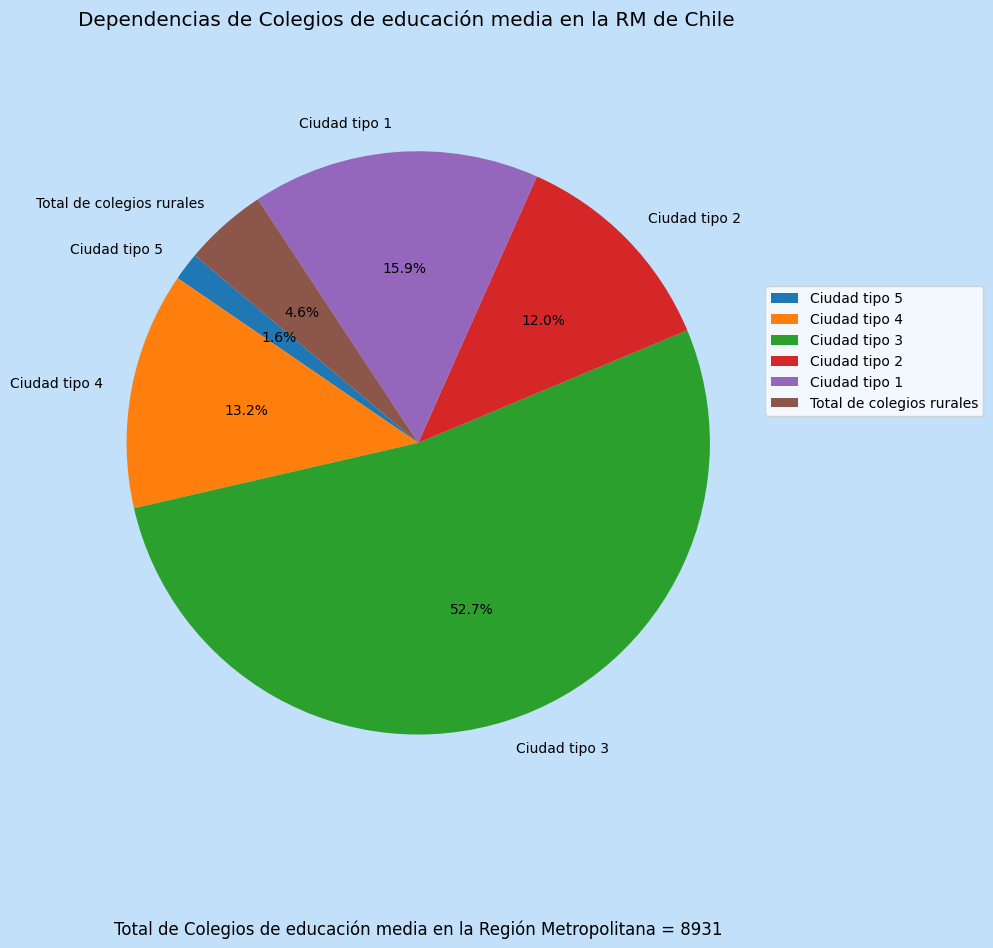

In [12]:
# Filtrar el DataFrame para excluir "Gran Total" y "Total colegios en comunas"
filtered_result_df = result_df[~result_df['Tipo de colegio'].isin(["Gran Total", "Total colegios en comunas"])]

# Color de fondo azul celeste claro
color_fondo = "#C2E0F9"

plt.figure(figsize=(10, 9.5), facecolor=color_fondo)  # Establecer el color de fondo
wedges, texts, autotexts = plt.pie(filtered_result_df['Cantidad'], labels=filtered_result_df['Tipo de colegio'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que la gráfica de pastel sea circular

# Crear lista de parches a partir de los wedges del pastel
custom_patches = wedges

# Agregar leyenda personalizada con los parches obtenidos de los wedges
plt.legend(custom_patches, filtered_result_df['Tipo de colegio'], bbox_to_anchor=(1, 0.7), fontsize='medium')

# Ajustar el título y centrarlo
plt.title("Dependencias de Colegios de educación media en la RM de Chile", loc='left', fontsize='x-large')

# Pie de página
plt.annotate("Total de Colegios de educación media en la Región Metropolitana = 8931", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=12)

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()




In [13]:
#Dentro de la Region Metropolitana quiero saber cual comuna tiene mayor cantidad de colegios de Educación media
comuna_mas_colegiosRM = dfRM['NOM_COM_RBD'].mode()[0]
cantidad_estudiantesRM  = dfRM['NOM_COM_RBD'].value_counts()[comuna_mas_colegiosRM]


print("La comuna que mas colegios tiene en la Región metropolitana es:", comuna_mas_colegiosRM)
print("Hay en total:", cantidad_estudiantesRM, "estudiantes de educación media en dicha comuna.")


La comuna que mas colegios tiene en la Región metropolitana es: PUENTE ALTO
Hay en total: 100824 estudiantes de educación media en dicha comuna.


In [14]:
# Contar la cantidad de colegios únicos en cada comuna
colegios_por_comuna = df.groupby('NOM_COM_RBD')['NOM_RBD'].nunique()

# Ordenar las comunas según el número de colegios únicos en orden descendente
comunas_mas_colegios = colegios_por_comuna.sort_values(ascending=False)

# Seleccionar las comunas con la mayor cantidad de colegios (por ejemplo, las 5 primeras)
top_comunas = comunas_mas_colegios.head(7)

print("Comunas con más colegios en Chile:")
print(top_comunas)


Comunas con más colegios en Chile:
NOM_COM_RBD
TEMUCO          143
VIÑA DEL MAR    133
PUENTE ALTO     128
LA FLORIDA      128
VALPARAÍSO      127
PUERTO MONTT    126
MAIPÚ           122
Name: NOM_RBD, dtype: int64


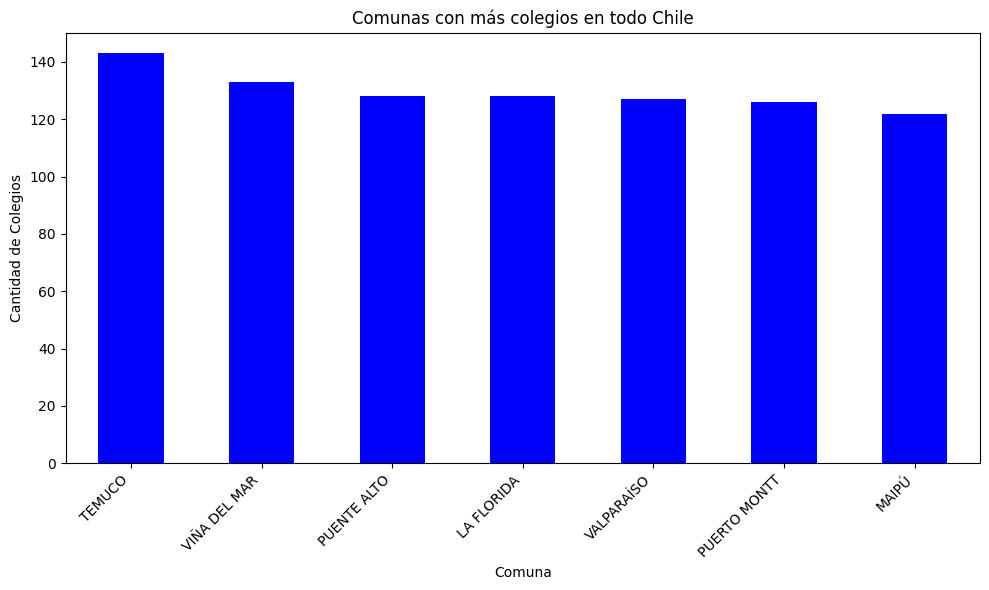

In [15]:
#Es muy curioso que entre el top 7 de comunas con más colegios de Chile esten 4 fuera de la región metropolitana

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_comunas.plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Comunas con más colegios en todo Chile')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Colegios')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [16]:
# Contar la cantidad de colegios únicos en cada comuna
colegios_por_comuna = dfRM.groupby('NOM_COM_RBD')['NOM_RBD'].nunique()

# Ordenar las comunas según el número de colegios únicos en orden descendente
comunas_mas_colegios = colegios_por_comuna.sort_values(ascending=False)

# Seleccionar las comunas con la mayor cantidad de colegios (por ejemplo, las 5 primeras)
top_comunas = comunas_mas_colegios.head(7)

print("Comunas con más colegios en Chile:")
print(top_comunas)


Comunas con más colegios en Chile:
NOM_COM_RBD
LA FLORIDA      128
PUENTE ALTO     128
MAIPÚ           122
SANTIAGO        112
SAN BERNARDO     90
ÑUÑOA            63
EL BOSQUE        56
Name: NOM_RBD, dtype: int64


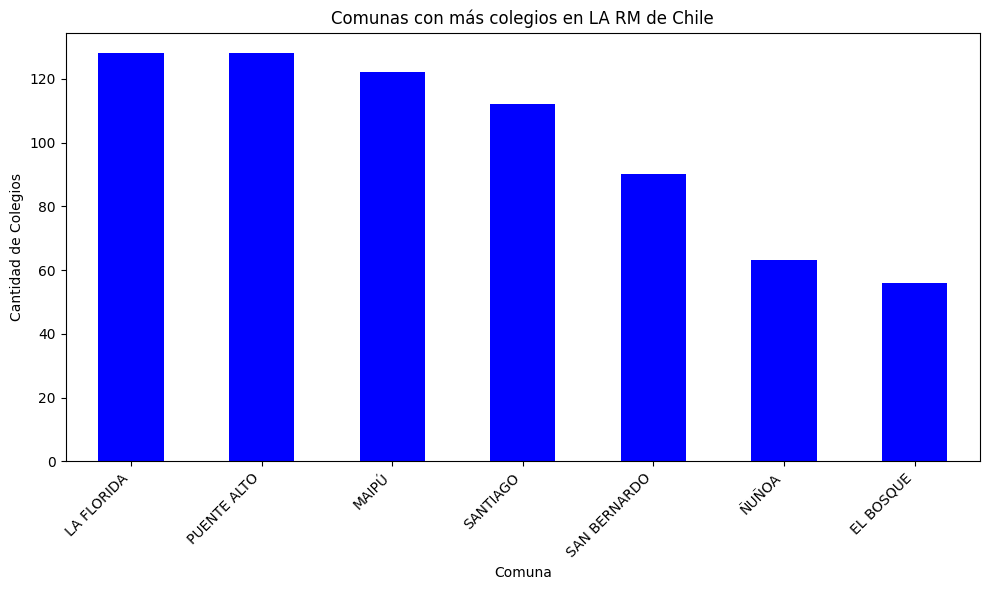

In [18]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_comunas.plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Comunas con más colegios en LA RM de Chile')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Colegios')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [77]:
#Voy a crear un mask para hacer un zoom en los colegios de Puente Alto por ser la comuna más numeros 

# Defino una wrangle function para ir limpiando la función 
def wranglePA(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Agrego una mask_region para ver solo los colegios de la Región Metropolitana de Santiago de Chile 
    mask_region=df["COD_REG_RBD"]==13 
    #Establezco una mask por la comuna de Puente Alto ya que es la que mas estudiantes tiene
    mask_PA = df["NOM_COM_RBD"]== "PUENTE ALTO"
    mask_maipu=df["NOM_COM_RBD"]=="MAIPÚ"
    #mask_code =df["RBD"]==9881
    df = df[mask_PA]
    return df


In [78]:
#Establezco la ruta del archivo que va a ser leida en la wrangle function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
dfPA = wranglePA(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", dfRM.shape);
dfPA.head()

C:\Users\amilc\AppData\Local\Temp\ipykernel_17324\342857730.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (1286230, 39)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1572990,2022,9312,2,CHILEAN EAGLES COLLEGE - LA FLORIDA,13,RM,132,13201,PUENTE ALTO,136,...,13122,PEÑALOLÉN,0,0,0,0,0,Y,Y,0
1572991,2022,9312,2,CHILEAN EAGLES COLLEGE - LA FLORIDA,13,RM,132,13201,PUENTE ALTO,136,...,13201,PUENTE ALTO,0,0,0,"6,6",75,P,P,0
1572992,2022,9312,2,CHILEAN EAGLES COLLEGE - LA FLORIDA,13,RM,132,13201,PUENTE ALTO,136,...,13201,PUENTE ALTO,0,0,0,"6,2",83,P,P,0
1572993,2022,9312,2,CHILEAN EAGLES COLLEGE - LA FLORIDA,13,RM,132,13201,PUENTE ALTO,136,...,13101,SANTIAGO,0,0,0,0,0,Y,T,0
1572994,2022,9312,2,CHILEAN EAGLES COLLEGE - LA FLORIDA,13,RM,132,13201,PUENTE ALTO,136,...,13201,PUENTE ALTO,0,0,0,"6,8",84,P,P,0


In [113]:
print("df shape:", dfPA.shape);

df shape: (100824, 38)


In [114]:
conteo_cod_depe = dfPA['COD_DEPE'].value_counts().sort_index()
print(conteo_cod_depe)


COD_DEPE
1    16348
3    80879
4     3597
Name: count, dtype: int64


In [115]:
#Quiero ver la cantidad de colegios en la comuna de PUENTE ALTO 

colegios_PA = dfPA.drop_duplicates(subset='RBD')

cantidad_colegios_PA = len(colegios_PA)

print("Cantidad de colegios únicos en Puente Alto:", cantidad_colegios_unicos_puente_alto)


Cantidad de colegios únicos en Puente Alto: 128


In [116]:
# Crear un DataFrame con los valores y el índice correspondiente
estudiantes_dependencia = dfPA['COD_DEPE'].value_counts().sort_index()
df_es = pd.DataFrame({'COD_DEPE': estudiantes_dependencia.index, 'estudiantes_dependencia': estudiantes_dependencia.values})

print(df_es)





   COD_DEPE  estudiantes_dependencia
0         1                    16348
1         3                    80879
2         4                     3597


In [117]:
#Aqui estoy contando cuantas escuelas hay por codigo_depe
conteo_cod_depe_rbd = dfPA.groupby('COD_DEPE')['RBD'].nunique().sort_index()

df_conteo_cod_depe_rbd = pd.DataFrame({
    'COD_DEPE': conteo_cod_depe_rbd.index,
    'Escuelas': conteo_cod_depe_rbd.values
})

print(df_conteo_cod_depe_rbd)


   COD_DEPE  Escuelas
0         1        26
1         3        96
2         4         6


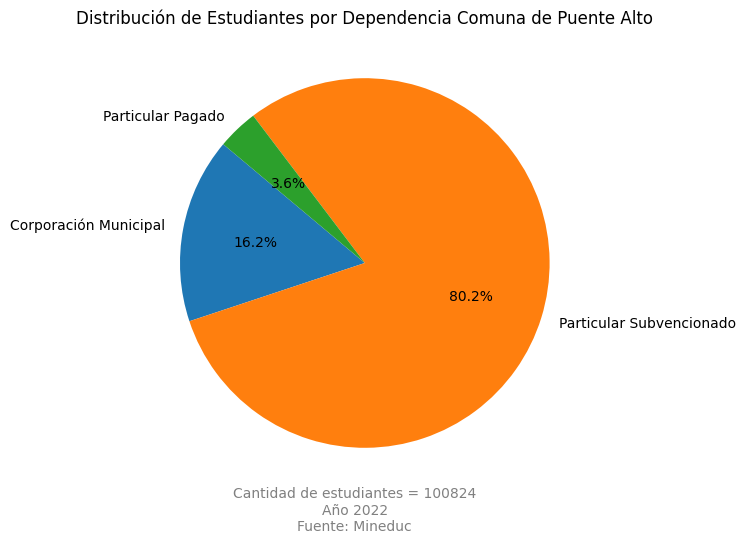

In [119]:
# Valores y etiquetas para el gráfico de pastel
labels = ['Corporación Municipal', 'Particular Subvencionado', 'Particular Pagado']
sizes = df_final['estudiantes_dependencia']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Estudiantes por Dependencia Comuna de Puente Alto')

# Agregar la nota en la parte inferior
plt.figtext(0.5, 0.05, 'Cantidad de estudiantes = 100824\nAño 2022\nFuente: Mineduc', ha='center', fontsize=10, color='gray')

# Mostrar el gráfico
plt.show()



In [103]:
#Hagamos lo mismo para la comuna de La reina 
#Voy a crear un mask para hacer un zoom en los colegios de Puente Alto por ser la comuna más numeros 

# Defino una wrangle function para ir limpiando la función 
def wrangleRE(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Agrego una mask_region para ver solo los colegios de la Región Metropolitana de Santiago de Chile 
    mask_region=df["COD_REG_RBD"]==13 
    #Establezco una mask por la comuna de Puente Alto ya que es la que mas estudiantes tiene
    mask_RE = df["NOM_COM_RBD"]== "LA REINA"
    mask_maipu=df["NOM_COM_RBD"]=="MAIPÚ"
    #mask_code =df["RBD"]==9881
    df = df[mask_RE]
    return df

In [104]:
#Establezco la ruta del archivo que va a ser leida en la wrangle function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
dfRE = wrangleRE(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", dfRE.shape);
dfRE.head()

C:\Users\amilc\AppData\Local\Temp\ipykernel_17324\4224013822.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (20478, 37)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1488660,2022,9006,9,COMPLEJO EDUCACIONAL LA REINA,13,RM,131,13113,LA REINA,133,...,13113,LA REINA,0,0,0,"6,7",86,P,P,0
1488661,2022,9006,9,COMPLEJO EDUCACIONAL LA REINA,13,RM,131,13113,LA REINA,133,...,13113,LA REINA,0,0,0,"5,3",93,P,P,0
1488662,2022,9006,9,COMPLEJO EDUCACIONAL LA REINA,13,RM,131,13113,LA REINA,133,...,13113,LA REINA,0,0,0,"4,8",49,R,R,0
1488663,2022,9006,9,COMPLEJO EDUCACIONAL LA REINA,13,RM,131,13113,LA REINA,133,...,13113,LA REINA,0,0,0,0,0,Y,T,0
1488664,2022,9006,9,COMPLEJO EDUCACIONAL LA REINA,13,RM,131,13113,LA REINA,133,...,13113,LA REINA,0,0,0,"5,9",69,P,P,0


In [105]:
conteo_cod_depe = dfRE['COD_DEPE'].value_counts().sort_index()
print(conteo_cod_depe)

COD_DEPE
1     3787
3     5778
4    10913
Name: count, dtype: int64


In [106]:
#Quiero ver la cantidad de colegios en la comuna de PUENTE ALTO 

colegios_RE = dfRE.drop_duplicates(subset='RBD')

cantidad_colegios_RE = len(colegios_RE)

print("Cantidad de colegios únicos en La Reina:", cantidad_colegios_RE)

Cantidad de colegios únicos en La Reina: 32


In [107]:
# Crear un DataFrame con los valores y el índice correspondiente
estudiantes_dependencia = dfRE['COD_DEPE'].value_counts().sort_index()
df_es = pd.DataFrame({'COD_DEPE': estudiantes_dependencia.index, 'estudiantes_dependencia': estudiantes_dependencia.values})

print(df_es)


   COD_DEPE  estudiantes_dependencia
0         1                     3787
1         3                     5778
2         4                    10913


In [108]:
#Aqui estoy contando cuantas escuelas hay por codigo_depe
conteo_cod_depe_rbd = dfRE.groupby('COD_DEPE')['RBD'].nunique().sort_index()

df_conteo_cod_depe_rbd = pd.DataFrame({
    'COD_DEPE': conteo_cod_depe_rbd.index,
    'Escuelas': conteo_cod_depe_rbd.values
})

print(df_conteo_cod_depe_rbd)


   COD_DEPE  Escuelas
0         1         6
1         3         9
2         4        17


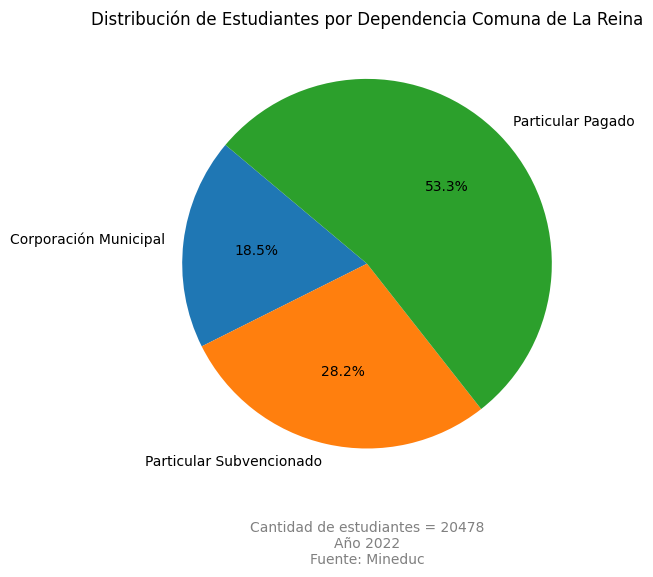

In [126]:

estudiantes_dependencia = dfRE['COD_DEPE'].value_counts().sort_index()
df_es = pd.DataFrame({'COD_DEPE': estudiantes_dependencia.index, 'estudiantes_dependencia': estudiantes_dependencia.values})


conteo_cod_depe_rbd = dfRE.groupby('COD_DEPE')['RBD'].nunique().sort_index()
df_conteo_cod_depe_rbd = pd.DataFrame({
    'COD_DEPE': conteo_cod_depe_rbd.index,
    'Escuelas': conteo_cod_depe_rbd.values
})

# Unir los DataFrames en uno solo
df_final = df_es.merge(df_conteo_cod_depe_rbd, on='COD_DEPE')

# Descripción de los valores de COD_DEPE
cod_depe_descripcion = {
    1: 'Corporación Municipal',
    3: 'Particular Subvencionado',
    4: 'Particular Pagado'
}

# Agregar la columna de descripción al DataFrame final
df_final['Descripción'] = df_final['COD_DEPE'].map(cod_depe_descripcion)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(df_final['estudiantes_dependencia'], labels=df_final['Descripción'], autopct='%1.1f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Distribución de Estudiantes por Dependencia Comuna de La Reina')

# Agregar la nota en la parte inferior del gráfico
plt.text(0.5, -0.15, 'Cantidad de estudiantes = 20478\nAño 2022\nFuente: Mineduc', ha='center', transform=plt.gca().transAxes, fontsize=10, color='gray')

# Mostrar el gráfico
plt.show()


In [4]:
#Como mi comuna de residencia es Maipú voy a partir de ahora solo observar maipú y para eso meto un mask de maipu en el wrangle
#MAIPU

# Defino una wrangle function para ir limpiando la función 
def wrangleMA(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Establezco una mask por la comuna objeto de estudio Maipú
    mask_ma=df["NOM_COM_RBD"]=="MAIPÚ"
    #mask_code =df["RBD"]==9881
    df = df[mask_ma]
    return df

In [5]:
#Establezco la ruta del archivo que va a ser leida en la wrangleMA function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
dfMA = wrangleMA(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", dfMA.shape);
dfMA.head()

C:\Users\amilc\AppData\Local\Temp\ipykernel_23728\2743991822.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (89603, 37)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1328326,2022,8511,1,LICEO EXPERIMENTAL ARTISTICO B-65,13,RM,131,13119,MAIPÚ,134,...,13101,SANTIAGO,0,0,0,"6,5",87,P,P,0
1328327,2022,8511,1,LICEO EXPERIMENTAL ARTISTICO B-65,13,RM,131,13119,MAIPÚ,134,...,13101,SANTIAGO,0,0,0,"6,7",92,P,P,0
1328328,2022,8511,1,LICEO EXPERIMENTAL ARTISTICO B-65,13,RM,131,13119,MAIPÚ,134,...,13101,SANTIAGO,0,0,0,"6,9",85,P,P,0
1328329,2022,8511,1,LICEO EXPERIMENTAL ARTISTICO B-65,13,RM,131,13119,MAIPÚ,134,...,13120,ÑUÑOA,0,0,0,"6,8",87,P,P,0
1328330,2022,8511,1,LICEO EXPERIMENTAL ARTISTICO B-65,13,RM,131,13119,MAIPÚ,134,...,13117,LO PRADO,0,0,0,"6,7",92,P,P,0


In [7]:
#Vamos a explorar esta comuna 
#Veamos la cantidad de estudiantes
num_estudiantes_ma =len(dfMA)
print("En La comuna de maipú hay:",num_estudiantes_ma,"estudiantes")

En La comuna de maipú hay: 89603 estudiantes


In [11]:
#Quiero calcular el numero de colegios disponibles para esos 89603 estudiantes
colegios_ma=dfMA["NOM_RBD"].nunique()
print("En la comuna de Maipú hay:",colegios_ma,"colegios")

En la comuna de Maipú hay: 122 colegios


In [15]:
colegios_unicos = dfMA.drop_duplicates(subset='NOM_RBD')

# Contar los tipos de colegios en los colegios únicos
tipo_counts = colegios_unicos['COD_DEPE'].value_counts().sort_index()

# Inicializar una variable para sumar las cantidades
total_colegios = 0

# Crear un nuevo DataFrame con los resultados
result_data = {'Tipo de colegio': [], 'Cantidad': []}
for code in [5, 4, 3, 2, 1]:
    count = tipo_counts.get(code, 0)
    total_colegios += count
    result_data['Tipo de colegio'].append(f"Ciudad tipo {code}")
    result_data['Cantidad'].append(count)

# Agregar el total al DataFrame de resultados
result_data['Tipo de colegio'].append("Total colegios en maipú")
result_data['Cantidad'].append(total_colegios)

# Calcular la diferencia y agregarla al DataFrame de resultados
num_colegios = len(dfMA['RBD'].unique())
diferencia = num_colegios - total_colegios
result_data['Tipo de colegio'].append("Colegios rurales Maipú")
result_data['Cantidad'].append(diferencia)

# Agregar el Gran Total al DataFrame de resultados
result_data['Tipo de colegio'].append("Gran Total")
result_data['Cantidad'].append(num_colegios)

result_df = pd.DataFrame(result_data)

print(result_df)

           Tipo de colegio  Cantidad
0            Ciudad tipo 5         2
1            Ciudad tipo 4         8
2            Ciudad tipo 3        87
3            Ciudad tipo 2         0
4            Ciudad tipo 1        25
5  Total colegios en maipú       122
6   Colegios rurales Maipú         1
7               Gran Total       123


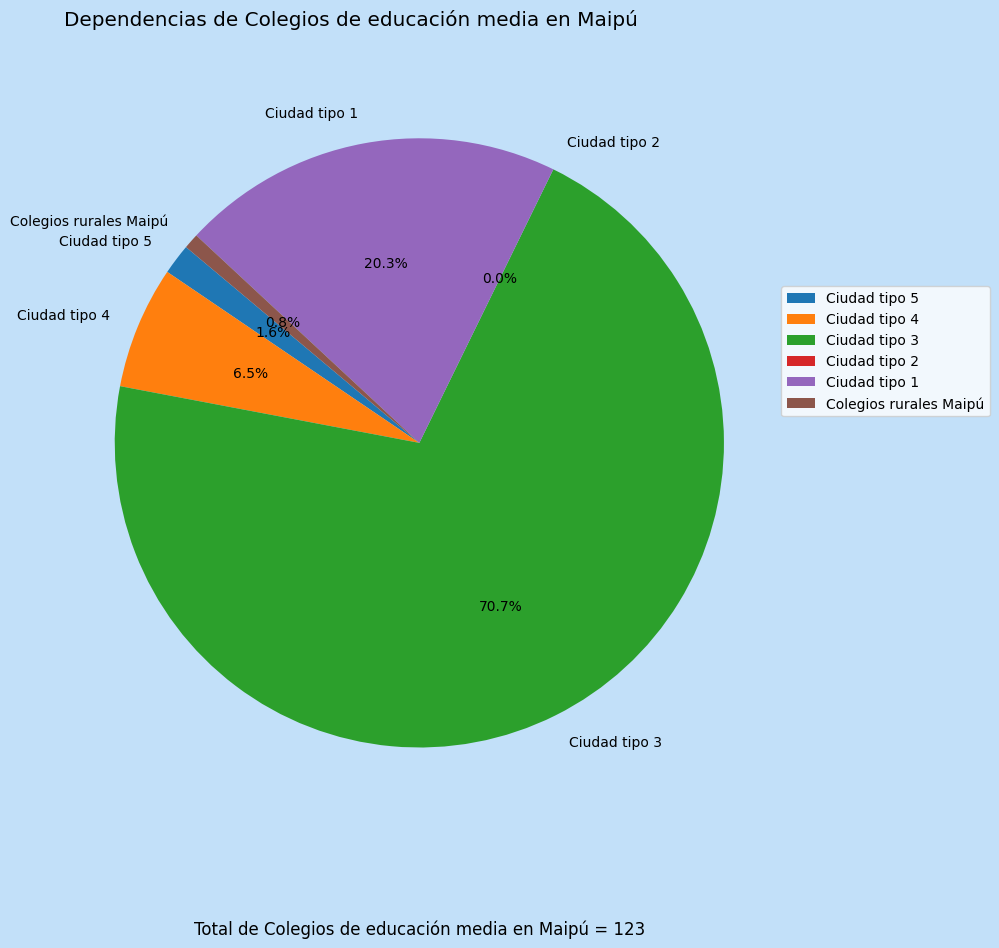

In [18]:

# Filtrar el DataFrame para excluir "Gran Total" y "Total colegios en comunas"
filtered_result_df = result_df[~result_df['Tipo de colegio'].isin(["Gran Total", "Total colegios en maipú"])]

# Color de fondo azul celeste claro
color_fondo = "#C2E0F9"

plt.figure(figsize=(10, 9.5), facecolor=color_fondo)  # Establecer el color de fondo
wedges, texts, autotexts = plt.pie(filtered_result_df['Cantidad'], labels=filtered_result_df['Tipo de colegio'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que la gráfica de pastel sea circular

# Crear lista de parches a partir de los wedges del pastel
custom_patches = wedges

# Agregar leyenda personalizada con los parches obtenidos de los wedges
plt.legend(custom_patches, filtered_result_df['Tipo de colegio'], bbox_to_anchor=(1, 0.7), fontsize='medium')

# Ajustar el título y centrarlo
plt.title("Dependencias de Colegios de educación media en Maipú", loc='left', fontsize='x-large')

# Pie de página
plt.annotate("Total de Colegios de educación media en Maipú = 123", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=12)

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()


In [ ]:
#En el grafico anterior se observa que evidentemente predominan los colegios particulares subvencionados 

In [105]:
#Miranda cursa actualmente septimo basico y estudia en el vicente reyes, incorporemos eso a la mask para ver ese colegio en particular
#Debo modificar mi WrangleMA
def wrangleMA(rutadelarchivo):
    # Leer el archivo CSV con punto y coma como delimitador
    df = pd.read_csv(rutadelarchivo, delimiter=";")
    #Establezco una mask por la comuna objeto de estudio Maipú
    mask_ma=df["NOM_COM_RBD"]=="MAIPÚ"
    mask_code =df["RBD"]==9881 #Para acceder unicamente al Colegio Vicente Reyes
    df = df[mask_ma & mask_code]
    return df


In [111]:
#Establezco la ruta del archivo que va a ser leida en la wrangleMA function. 

# Ruta al archivo CSV
ruta = "C:\\Users\\amilc\\Downloads\\base_datos\\20230209_Rendimiento_2022_20230131_WEB.csv"

# Llamar a la función wrangle para leer el archivo CSV
dfMA = wrangleMA(ruta)

# Imprimir la forma del DataFrame y las primeras filas
print("df shape:", dfMA.shape);
dfMA.head(2)

C:\Users\amilc\AppData\Local\Temp\ipykernel_23728\3212223316.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rutadelarchivo, delimiter=";")


df shape: (528, 37)


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1725559,2022,9881,7,ESCUELA VICENTE REYES PALAZUELOS,13,RM,131,13119,MAIPÚ,134,...,13119,MAIPÚ,0,0,0,0,0,Y,T,0
1725560,2022,9881,7,ESCUELA VICENTE REYES PALAZUELOS,13,RM,131,13119,MAIPÚ,134,...,13501,MELIPILLA,0,0,0,"6,9",58,P,P,0


In [112]:
#Necesito modificar las "," de la columna PROM_GRAL por "." para poder ser reconocidas por python
# Reemplazar comas por puntos en la columna "PROM_GRAL"
dfMA["PROM_GRAL"] = dfMA["PROM_GRAL"].str.replace(",", ".")

# Convertir la columna a tipo numérico (si es necesario)
dfMA["PROM_GRAL"] = pd.to_numeric(dfMA["PROM_GRAL"], errors="coerce")

In [47]:
# Imprimir los nombres de todas las columnas en dfMA
column_names = dfMA.columns
print("Nombres de las columnas en dfMA:")
for column_name in column_names:
    print(column_name)


Nombres de las columnas en dfMA:
AGNO
RBD
DGV_RBD
NOM_RBD
COD_REG_RBD
NOM_REG_RBD_A
COD_PRO_RBD
COD_COM_RBD
NOM_COM_RBD
COD_DEPROV_RBD
NOM_DEPROV_RBD
COD_DEPE
COD_DEPE2
RURAL_RBD
ESTADO_ESTAB
COD_ENSE
COD_ENSE2
COD_GRADO
LET_CUR
COD_JOR
COD_TIP_CUR
COD_DES_CUR
MRUN
GEN_ALU
FEC_NAC_ALU
EDAD_ALU
COD_REG_ALU
COD_COM_ALU
NOM_COM_ALU
COD_RAMA
COD_SEC
COD_ESPE
PROM_GRAL
ASISTENCIA
SIT_FIN
SIT_FIN_R
COD_MEN


In [50]:
# Obtener valores únicos de la columna "COD_GRADO" en dfMA
unique_cod_grado = dfMA["COD_GRADO"].unique()

# Imprimir los valores únicos
print("Valores únicos de la columna COD_GRADO:")
for value in unique_cod_grado:
    print(value)
#Es visto que ahora podemos filtrar los estudiantes por curso 


Valores únicos de la columna COD_GRADO:
1
2
3
4
5
6
7
8


In [55]:
# Contar la cantidad de estudiantes por grado en la columna "COD_GRADO"
contagem_por_grado = dfMA["COD_GRADO"].value_counts()

# Ordenar el recuento por el índice (grados)
contagem_ordenada_por_grado = contagem_por_grado.sort_index()

# Imprimir el recuento ordenado por grado
print("Recuento de estudiantes por grado (ordenado por grado):")
for grado, cantidad in contagem_ordenada_por_grado.items():
    print(f"Grado {grado}: {cantidad} estudiantes")


Recuento de estudiantes por grado (ordenado por grado):
Grado 1: 72 estudiantes
Grado 2: 66 estudiantes
Grado 3: 66 estudiantes
Grado 4: 62 estudiantes
Grado 5: 77 estudiantes
Grado 6: 70 estudiantes
Grado 7: 57 estudiantes
Grado 8: 58 estudiantes


In [37]:
#Quiero saber cual fue la matricula del año 2022 en ese colegio 
matriculaVR=dfMA.shape[0]
print("En el 2022 hubo una matricula de:",matriculaVR,"estudiantes en el Vicente Reyes")

En el 2022 hubo una matricula de: 528 estudiantes en el Vicente Reyes


In [70]:
# Filtrar valores de PROM_GRAL donde COD_GRADO es igual a 6 Quiero ver solo el sexto grado
prom_grado_6 = dfMA.loc[(dfMA["COD_GRADO"] == 6) & (dfMA["PROM_GRAL"] != 0), "PROM_GRAL"]



# Imprimir los valores correspondientes a COD_GRADO == 6 en PROM_GRAL
print(prom_grado_6.head())

max_6to=prom_grado_6.max()
print("la maxima calificación del sexto grado 2022 fue:",max_6to)
min_6to=prom_grado_6.min()
print("la minima calificación del sexto grado 2022 fue:",min_6to)


1725902    6.4
1725903    6.3
1725904    6.2
1725905    5.7
1725906    6.3
Name: PROM_GRAL, dtype: float64
la maxima calificación del sexto grado 2022 fue: 6.8
la minima calificación del sexto grado 2022 fue: 5.2


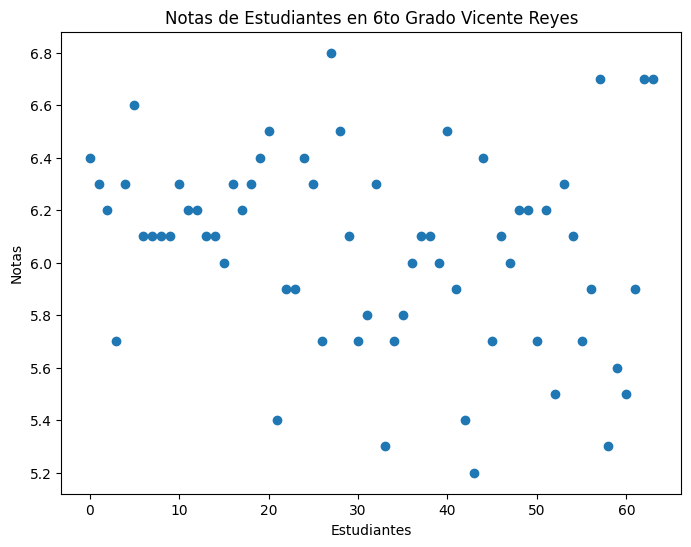

In [75]:
import matplotlib.pyplot as plt

# Supongamos que prom_grado_6 es tu serie de notas de estudiantes en el grado 6

# Crear un Scatter Plot para visualizar las notas del grado 6
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.scatter(range(len(prom_grado_6)), prom_grado_6)
plt.title("Notas de Estudiantes en 6to Grado Vicente Reyes")
plt.xlabel("Estudiantes")
plt.ylabel("Notas")
plt.show()



In [77]:
# Calificación máxima
max_valor = dfMA["PROM_GRAL"].max()
print("La máxima calificación general del colegio fue:", max_valor)
#Calificación minima 
min_valor = dfMA[dfMA["PROM_GRAL"]!=0]["PROM_GRAL"].min()
print("La minima calificación general del Vicente Reyes fue:",min_valor)



La máxima calificación general del colegio fue: 7.0
La minima calificación general del Vicente Reyes fue: 4.3


In [79]:
#Pero cuantos siete hay en el cole
# Contar cuántas veces se repite el valor 7.0 en la columna "PROM_GRAL"
repeticiones_7 = (dfMA["PROM_GRAL"] == 7.0).sum()

# Imprimir el número de repeticiones
print("El valor 7.0 se repite", repeticiones_7, "veces en la columna PROM_GRAL")



El valor 7.0 se repite 5 veces en la columna PROM_GRAL


In [85]:
#Peores estudiantes del colegio en el 2022
# Filtrar estudiantes con calificación de 4.30
estudiantes_mal_cal = dfMA[dfMA["PROM_GRAL"] == 4.30]

# Obtener los valores únicos de COD_GRADO para esos estudiantes
grados_estudiantes_mal = estudiantes_mal_cal["COD_GRADO"].unique()

# Imprimir los valores únicos de COD_GRADO para los estudiantes con calificación de 7.0
print("Los estudiantes con peores calificaciónes pertenecen a los siguientes COD_GRADO:", grados_estudiantes_mal)


Los estudiantes con peores calificaciónes pertenecen a los siguientes COD_GRADO: [1]


In [86]:
#Ahora quiero ver que estudian los mejores estudiantes del colegio en el 2022
# Filtrar estudiantes con calificación de 7.0
estudiantes_calificacion_7 = dfMA[dfMA["PROM_GRAL"] == 7.0]

# Obtener los valores únicos de COD_GRADO para esos estudiantes
grados_estudiantes_calificacion_7 = estudiantes_calificacion_7["COD_GRADO"].unique()

# Imprimir los valores únicos de COD_GRADO para los estudiantes con calificación de 7.0
print("Los estudiantes con calificación 7.0 pertenecen a los siguientes COD_GRADO:", grados_estudiantes_calificacion_7)


Los estudiantes con calificación 7.0 pertenecen a los siguientes COD_GRADO: [1 2]


In [113]:
#A partir de aqui voy a hacer ML para obtener un modelo que me permita tener las notas del 2023.
#Notas & Cantidad de estudiantes
#Nos enfocamos en prom_gral de todo el colegio no segmentaremos por grado para poder tener una buena cantidad de datos
#Veamos los quartiles
prom_todo_grado = dfMA[dfMA["PROM_GRAL"] != 0]["PROM_GRAL"]
prom_todo_grado.describe()


count    466.000000
mean       6.223820
std        0.460494
min        4.300000
25%        5.925000
50%        6.300000
75%        6.600000
max        7.000000
Name: PROM_GRAL, dtype: float64

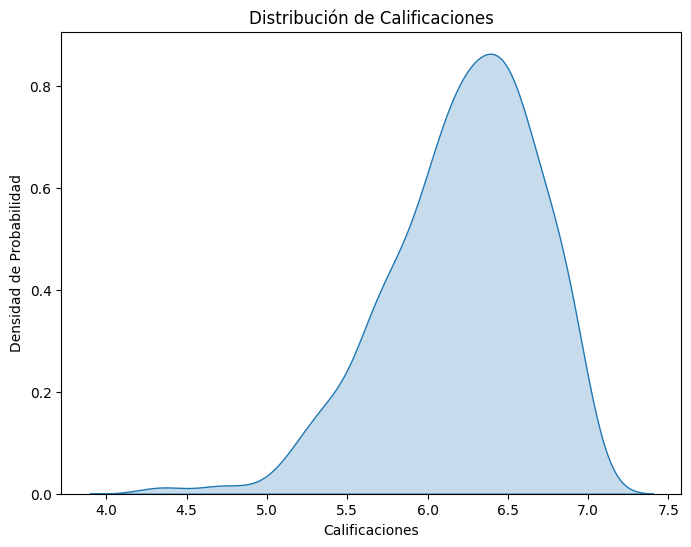

In [91]:
#Veamos lo anterior en un grafico de densidad 


# Crear un gráfico de densidad para visualizar la distribución de calificaciones
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.kdeplot(prom_todo_grado, shade=True)  # shade=True rellena el área bajo la curva
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Densidad de Probabilidad")
plt.show()


In [114]:
low, high = dfMA["PROM_GRAL"].quantile([0.1, 0.9])
mask_notas = dfMA["PROM_GRAL"].between(low, high)
dfMA = dfMA[mask_notas]
dfMA.shape




(497, 37)

In [115]:
dfMA.head(2)

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
1725559,2022,9881,7,ESCUELA VICENTE REYES PALAZUELOS,13,RM,131,13119,MAIPÚ,134,...,13119,MAIPÚ,0,0,0,0.0,0,Y,T,0
1725562,2022,9881,7,ESCUELA VICENTE REYES PALAZUELOS,13,RM,131,13119,MAIPÚ,134,...,7102,CONSTITUCIÓN,0,0,0,0.0,0,Y,T,0


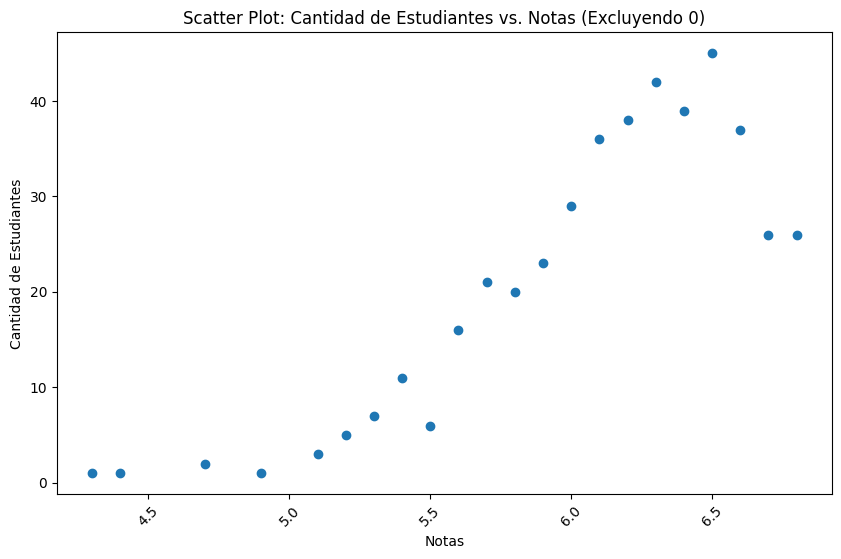

In [119]:
# Filtrar los estudiantes con calificación diferente de 0
df_filtered = dfMA[dfMA["PROM_GRAL"] != 0]

# Calcular la cantidad de estudiantes por cada nota única
notas_unique = df_filtered["PROM_GRAL"].unique()
cantidad_estudiantes_por_nota = df_filtered["PROM_GRAL"].value_counts()

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(notas_unique, cantidad_estudiantes_por_nota[notas_unique])
plt.title("Scatter Plot: Cantidad de Estudiantes vs. Notas (Excluyendo 0)")
plt.xlabel("Notas")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45)
plt.show()


#En el grafico que se muestra a continuación he removido efectivamente los outliers
#Se observa efectivamente una correlación positiva entre la cantidad de estudiantes y las notas




In [125]:
#Vamos a realizar el split que nos permita construir el modelo
#La feature es la cantidad de estudiantes

# Calcular la cantidad de estudiantes por cada nota única
cantidad_estudiantes_por_nota = dfMA[dfMA["PROM_GRAL"] != 0]["PROM_GRAL"].value_counts()

# Crear una columna "cantidad_estudiantes" en dfMA
dfMA["cantidad_estudiantes"] = dfMA["PROM_GRAL"].map(cantidad_estudiantes_por_nota)

# Eliminar filas con valores NaN en la columna "cantidad_estudiantes"
dfMA.dropna(subset=["cantidad_estudiantes"], inplace=True)

# Crear X_train con la columna "cantidad_estudiantes"
features = ["cantidad_estudiantes"]
X_train = dfMA[features]

# Mostrar las primeras filas de X_train
print(X_train.head())



         cantidad_estudiantes
1725563                  23.0
1725564                  38.0
1725565                   3.0
1725566                  38.0
1725567                  37.0


In [127]:
#Definimos el target como promedio general de notas
target = "PROM_GRAL"
y_train = dfMA[target]


In [128]:
y_mean = y_train.mean()
y_mean

6.174482758620689

In [130]:
y_pred_baseline = [y_mean] * len(y_train) #esta seria la predicción ingenua
type(y_pred_baseline)

list

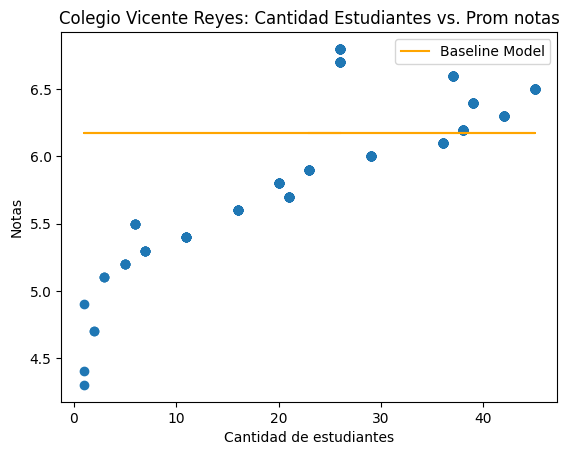

In [134]:
plt.plot(X_train.values,y_pred_baseline,color="orange",label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Cantidad de estudiantes")
plt.ylabel("Notas")
plt.title("Colegio Vicente Reyes: Cantidad Estudiantes vs. Prom notas")
plt.legend();

#como podemos ver este modelo ingenuo seria un fiasco pero es una buena manera de iniciar


In [135]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 6.17
Baseline MAE: 0.35


In [137]:
#a pesar de que 0.35 no es un error grueso, necesitamos realizar ajustes al modelo 
#En realidad aun no hemos construido el modelo lo anterior era una suposición asi que instanciamos el modelo
model = LinearRegression()

In [138]:
model.fit(X_train,y_train) #Ajustamos X_train & y_train

LinearRegression()

In [140]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]
#Esta serian las primeras 5 notas generadas por el modelo 

array([5.94832468, 6.37237108, 5.38292948, 6.37237108, 6.34410132])

In [142]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))
#SI bien 0.35 no era un error grueso, hemos disminuido aun mas el error

Training MAE: 0.22


In [144]:
#buscamos la intercepcion del modelo para construir la ecuación definitiva
intercept = (model.intercept_).round(2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 5.3


In [145]:
coefficient = (model.coef_[0]).round(2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 0.03


In [147]:
#Aqui estamos imprimiendo la ecuación general del modelo
print(f"prom_notas={intercept}+{coefficient}*cantidad_estudiantes")

prom_notas=5.3+0.03*cantidad_estudiantes


Text(0.5, 1.0, 'Colegio Vicente Reyes: Cantidad Estudiantes vs. Prom notas')

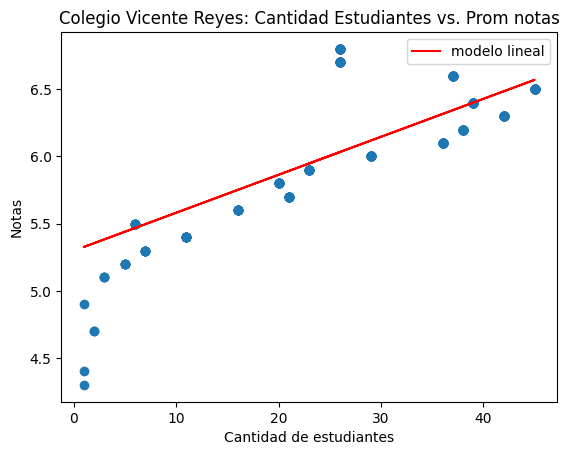

In [151]:
plt.plot(X_train.values, model.predict(X_train) ,color="r", label="modelo lineal")
plt.scatter(X_train, y_train)
plt.xlabel("Cantidad de estudiantes")
plt.ylabel("Notas")
plt.legend()
plt.title("Colegio Vicente Reyes: Cantidad Estudiantes vs. Prom notas")